In [ ]:

# mounting google drive with the google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading Dataset
import cv2
import os

data_path='dataset'
Data_Dir=os.listdir('/content/drive/MyDrive/dataset')
labels=[i for i in range(len(Data_Dir))]

label_dict=dict(zip(Data_Dir,labels)) #empty dictionary

print(label_dict)
print(Data_Dir)
print(labels)

{'with mask': 0, 'without mask': 1}
['with mask', 'without mask']
[0, 1]


In [ ]:
#Data preprocessing
import cv2
img_size=100
data=[]
target=[]


for category in Data_Dir:
    folder_path=os.path.join('/content/drive/MyDrive/dataset',category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
            #Coverting the image into gray scale
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the gray scale into 50x50, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)

        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image
In

['',
 "\nfrom google.colab import drive\ndrive.mount('/content/drive')",
 "import cv2\nimport os\n\ndata_path='dataset'\nData_Dir=os.listdir('/content/drive/MyDrive/dataset')\nlabels=[i for i in range(len(Data_Dir))]\n\nlabel_dict=dict(zip(Data_Dir,labels)) #empty dictionary\n\nprint(label_dict)\nprint(Data_Dir)\nprint(labels)",
 "import cv2\nimport os\n\ndata_path='dataset'\nData_Dir=os.listdir('/content/drive/MyDrive/dataset')\nlabels=[i for i in range(len(Data_Dir))]\n\nlabel_dict=dict(zip(Data_Dir,labels)) #empty dictionary\n\nprint(label_dict)\nprint(Data_Dir)\nprint(labels)",
 "import cv2\nimport os\n\ndata_path='dataset'\nData_Dir=os.listdir('/content/drive/MyDrive/dataset')\nlabels=[i for i in range(len(Data_Dir))]\n\nlabel_dict=dict(zip(Data_Dir,labels)) #empty dictionary\n\nprint(label_dict)\nprint(Data_Dir)\nprint(labels)",
 "import cv2\nimg_size=100\ndata=[]\ntarget=[]\n\n\nfor category in Data_Dir:\n    folder_path=os.path.join('/content/drive/MyDrive/dataset',category)\n 

In [ ]:

import numpy as np

data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)


In [ ]:
np.save('data',data)
np.save('target',new_target)

In [ ]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

#loading the save numpy arrays in the previous code

In [ ]:
# training the model
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [ ]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)


In [ ]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)


Epoch 1/20
31/31 [==============================] - 35s 137ms/step - loss: 0.6580 - accuracy: 0.6081 - val_loss: 0.5575 - val_accuracy: 0.7177
INFO:tensorflow:Assets written to: model-001.model/assets
Epoch 2/20
31/31 [==============================] - 3s 90ms/step - loss: 0.4618 - accuracy: 0.7889 - val_loss: 0.3763 - val_accuracy: 0.8750
INFO:tensorflow:Assets written to: model-002.model/assets
Epoch 3/20
31/31 [==============================] - 3s 90ms/step - loss: 0.2742 - accuracy: 0.8980 - val_loss: 0.2396 - val_accuracy: 0.9113
INFO:tensorflow:Assets written to: model-003.model/assets
Epoch 4/20
31/31 [==============================] - 3s 89ms/step - loss: 0.1914 - accuracy: 0.9273 - val_loss: 0.2906 - val_accuracy: 0.8831
Epoch 5/20
31/31 [==============================] - 3s 90ms/step - loss: 0.1304 - accuracy: 0.9586 - val_loss: 0.1545 - val_accuracy: 0.9556
INFO:tensorflow:Assets written to: model-005.model/assets
Epoch 6/20
31/31 [==============================] - 3s 89ms/s

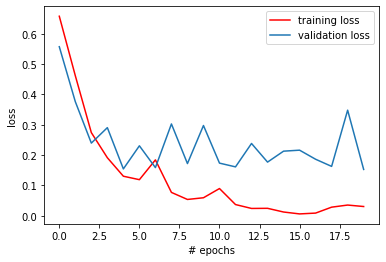

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

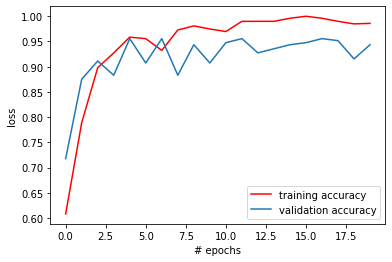

In [ ]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
print(model.evaluate(test_data,test_target))

5/5 [==============================] - 0s 101ms/step - loss: 0.0541 - accuracy: 0.9783
[0.054116979241371155, 0.97826087474823]


In [ ]:
from keras.models import load_model
import cv2
import numpy as np

In [2]:
face_classifier=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
# Capture Video
vid_source = cv2.VideoCapture(0)
# Dictionaries containina details of Wearina Mask and Color of rectanale around face. If wearina mask then color IoL
# green and if not wearing mask then color of rectangle around face would be red
text_dict={'Mask ON' ,'No Mask'}
rect_colordict={ (0,255, 0), (0, 0, 255)}

# SUBJECT ="Subject"
# TEXT ="One Visitor violated Face Mask Policy. See in the camera to recognize user.
# A Person has been detected without a face mask in the Hotel Lobby Area 9. Please Alert the authorities.
# Photo Captured:
# While Loop to continuously detect camera feed
while(True):
     
     ret, img = vid_source.read()
     grayscale_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
     faces=face_classifier.detectMultiScale(grayscale_img,1.3,5)

for (x,y,w,h) in faces:
 face_img=grayscale_img[y:y+w,X:X+W]
resized_img = cv2. resize(face_img, (112,112))
normalized_img = resized_img/255.0
reshaped_img=np.reshape(normalized_img(1, 142, 112, 1))
result=model.predict(reshaped_img)
label=np.argmax(result, axis=1)[0]
cv2. rectangle (img, (x,y), (X+w,Y+h), ret_color[label],2)
cv2. rectangle (img, (x,y-40) , (x+W,y), rect_color[label], -1)

Cv2. putText (img, text_[label], (x, y-10) ,Cv2. FONT_HERSHEY_SIMPLEX, .8, (0,0, 0) , 2)
# If Label = 1 then it means wearing No Mask and © means wearing Mask
if (label == 1) :
   # Throw a Warning Message to tell user to wear a mask if not wearing one. This will stay
   #open and No Access will be given He/She wears the mask
   messagebox.showwarning("Warning","Access Denied. Please wear a Face Mask")
   # Send an email to the administrator if access denied/user not wearing face mask
   message= 'Subject: (]In\n{]' .format (SUBJECT, TEXT)
   mail = smtplib.SMTP('smtp.gmail.com', 587)
   mail.ehlo()
   mail.starttls()
   mail.login('rakesh21@gmail.com')
   mail.sendmail('Developer.rakesh21@gmail.com','Developer.rakesh21@gmail.com',message)
   mail.close
else :
     pass
     break
cv2.imshow('LIVE Video Feed',img)
key=cv2.waitKey(1)
if(key==27):
   break
cv2.destroyAllWindow()
source.release()


NameError: ignored